B1. Import & nạp dữ liệu

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Nạp dữ liệu CSV
df = pd.read_csv('/content/drive/MyDrive/PTTQHDL/Online Retail.csv', encoding='ISO-8859-1')
df.head()




/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


B2. Kiểm tra nhanh kích thước + info

In [ ]:
print("Số bản ghi:", len(df))
print("Số invoice unique:", df['InvoiceNo'].nunique())
print("Số product unique:", df['StockCode'].nunique())
print(df.info())


Số bản ghi: 541909
Số invoice unique: 25900
Số product unique: 4070
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


B3. Làm sạch dữ liệu

In [ ]:
df = df.dropna(subset=['InvoiceNo','Description'])
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['Description'] = df['Description'].str.strip().str.upper()
df.reset_index(drop=True, inplace=True)

print("Sau khi làm sạch:", len(df))
df.head()



Sau khi làm sạch: 530104


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


B4. Tính doanh thu

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']


B5. Phân tích mô tả

In [ ]:
n_invoices = df['InvoiceNo'].nunique()
n_products = df['StockCode'].nunique()
n_customers = df['CustomerID'].nunique()
print(n_invoices, n_products, n_customers)

# Top 500 sản phẩm bán chạy (giảm số cột để tránh lỗi RAM)
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(500)
top_products.head(10)


19960 3922 4338


,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
JUMBO BAG RED RETROSPOT,48474
WHITE HANGING HEART T-LIGHT HOLDER,37891
POPCORN HOLDER,36761
ASSORTED COLOUR BIRD ORNAMENT,36461
PACK OF 72 RETROSPOT CAKE CASES,36419
RABBIT NIGHT LIGHT,30788


B6. Biểu đồ mô tả

Histogram số lượng sản phẩm trên hóa đơn


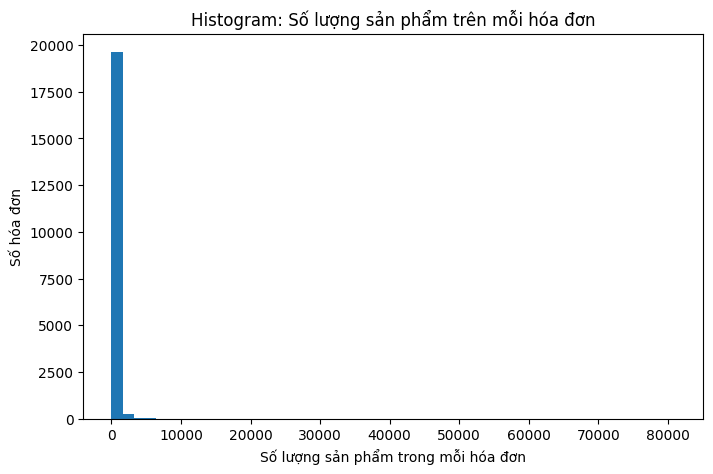

In [ ]:
invoice_counts = df.groupby('InvoiceNo')['Quantity'].sum()
plt.figure(figsize=(8,5))
plt.hist(invoice_counts, bins=50)
# plt.xlim(0,50)
plt.xlabel('Số lượng sản phẩm trong mỗi hóa đơn')
plt.ylabel('Số hóa đơn')
plt.title('Histogram: Số lượng sản phẩm trên mỗi hóa đơn')
plt.show()

 Bar chart top sản phẩm

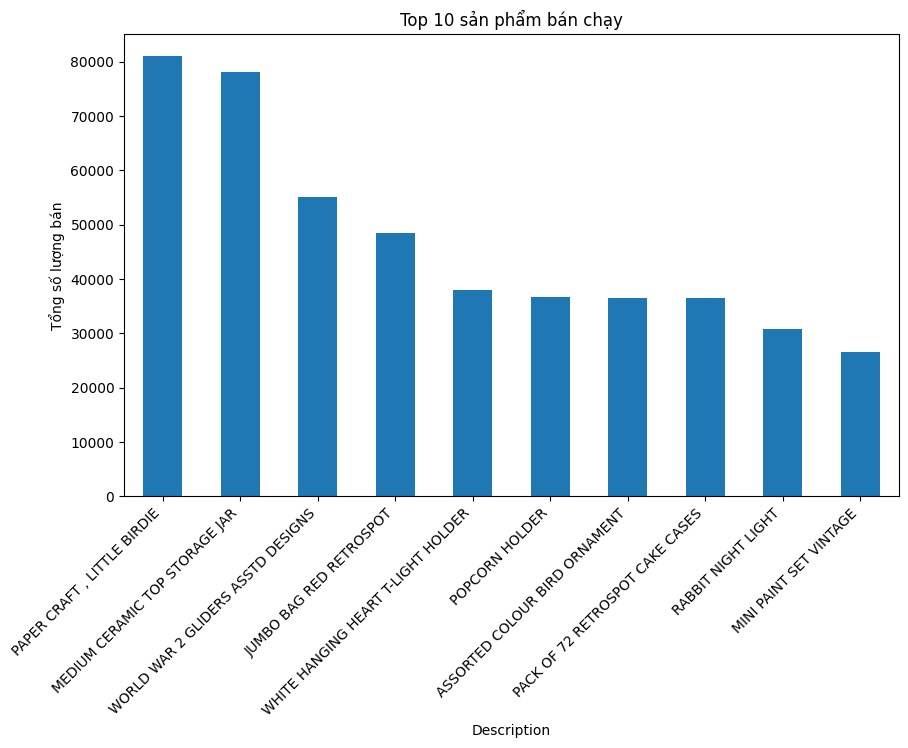

In [ ]:
plt.figure(figsize=(10,6))
top_products.head(10).plot(kind='bar')
plt.ylabel('Tổng số lượng bán')
plt.title('Top 10 sản phẩm bán chạy')
plt.xticks(rotation=45, ha='right')
plt.show()

 Line chart doanh thu theo tháng

/tmp/ipython-input-933702291.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rev = df.resample('M', on='InvoiceDate')['Revenue'].sum()


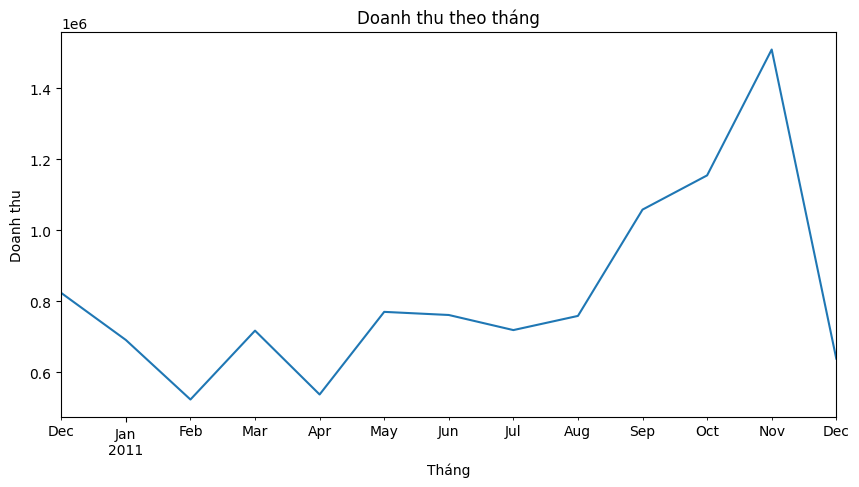

In [ ]:
monthly_rev = df.resample('M', on='InvoiceDate')['Revenue'].sum()
plt.figure(figsize=(10,5))
monthly_rev.plot()
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.show()

Bar chart số hóa đơn theo quốc gia (top 10)

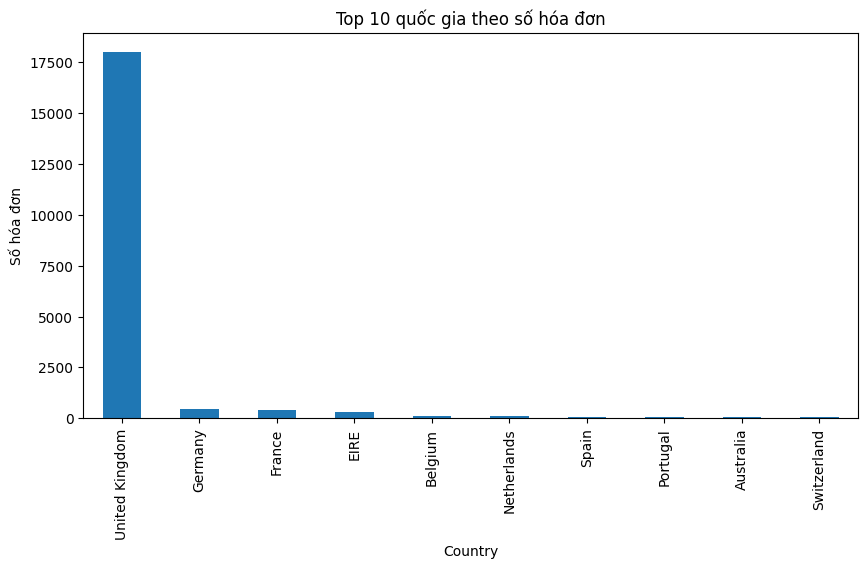

In [ ]:
country_counts = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
country_counts.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 quốc gia theo số hóa đơn')
plt.ylabel('Số hóa đơn')
plt.show()

B7. chuẩn bị dữ liệu cho Apriori theo kiểu danh sách giao dịch (transaction list)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Lấy tất cả transactions
transactions = df.groupby('InvoiceNo')['Description'].apply(list).values.tolist()


B8. tạo ma trận one-hot dạng sparse cho Apriori

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions, sparse=True)  # sparse matrix
basket_sparse = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
print("Shape basket_sparse:", basket_sparse.shape)



Shape basket_sparse: (19960, 4015)


/tmp/ipython-input-3723037945.py:3: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  basket_sparse = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


B9. chạy thuật toán Apriori để tìm các tập sản phẩm phổ biến

In [ ]:
min_support = 0.02  # 2% hóa đơn
frequent_itemsets = apriori(basket_sparse, min_support=min_support, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(20)



,support,itemsets
277,0.113026,(WHITE HANGING HEART T-LIGHT HOLDER)
103,0.104659,(JUMBO BAG RED RETROSPOT)
199,0.099599,(REGENCY CAKESTAND 3 TIER)
158,0.084419,(PARTY BUNTING)
128,0.078357,(LUNCH BAG RED RETROSPOT)
15,0.072896,(ASSORTED COLOUR BIRD ORNAMENT)
221,0.069389,(SET OF 3 CAKE TINS PANTRY DESIGN)
150,0.066132,(PACK OF 72 RETROSPOT CAKE CASES)
121,0.063778,(LUNCH BAG BLACK SKULL.)
140,0.062575,(NATURAL SLATE HEART CHALKBOARD)


Bước 10: Sinh luật kết hợp

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Sinh luật: metric = confidence, min_threshold = 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sắp xếp theo lift lớn nhất
rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

# Chọn các cột cần hiển thị
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)


,antecedents,consequents,support,confidence,lift
139,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.027104,0.707190,18.403524
136,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.027104,0.705346,18.403524
137,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.027104,0.904682,17.825724
138,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.027104,0.534057,17.825724
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031663,0.826144,16.278213
23,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031663,0.623889,16.278213
135,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.027104,0.856013,16.043204
140,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.027104,0.507981,16.043204
22,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.027355,0.720317,15.747557
21,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.027355,0.598028,15.747557


Trực quan hóa luật kết hợp

Scatter Plot (support – confidence – lift)

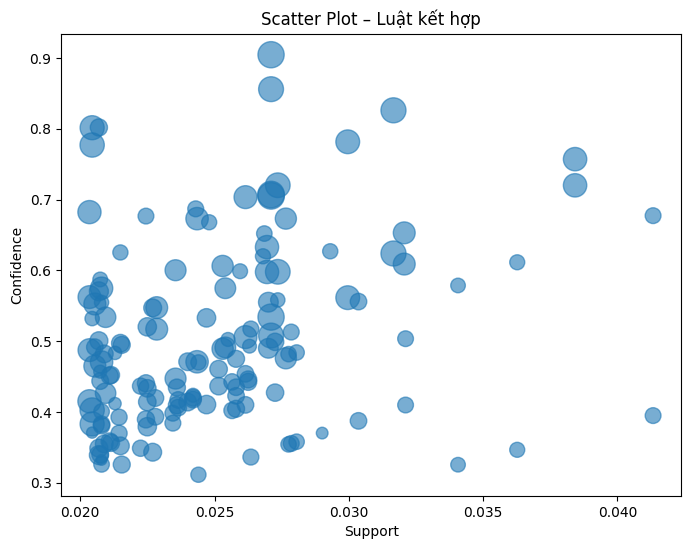

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*20, alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot – Luật kết hợp')
plt.show()



Biểu đồ Top luật theo lift

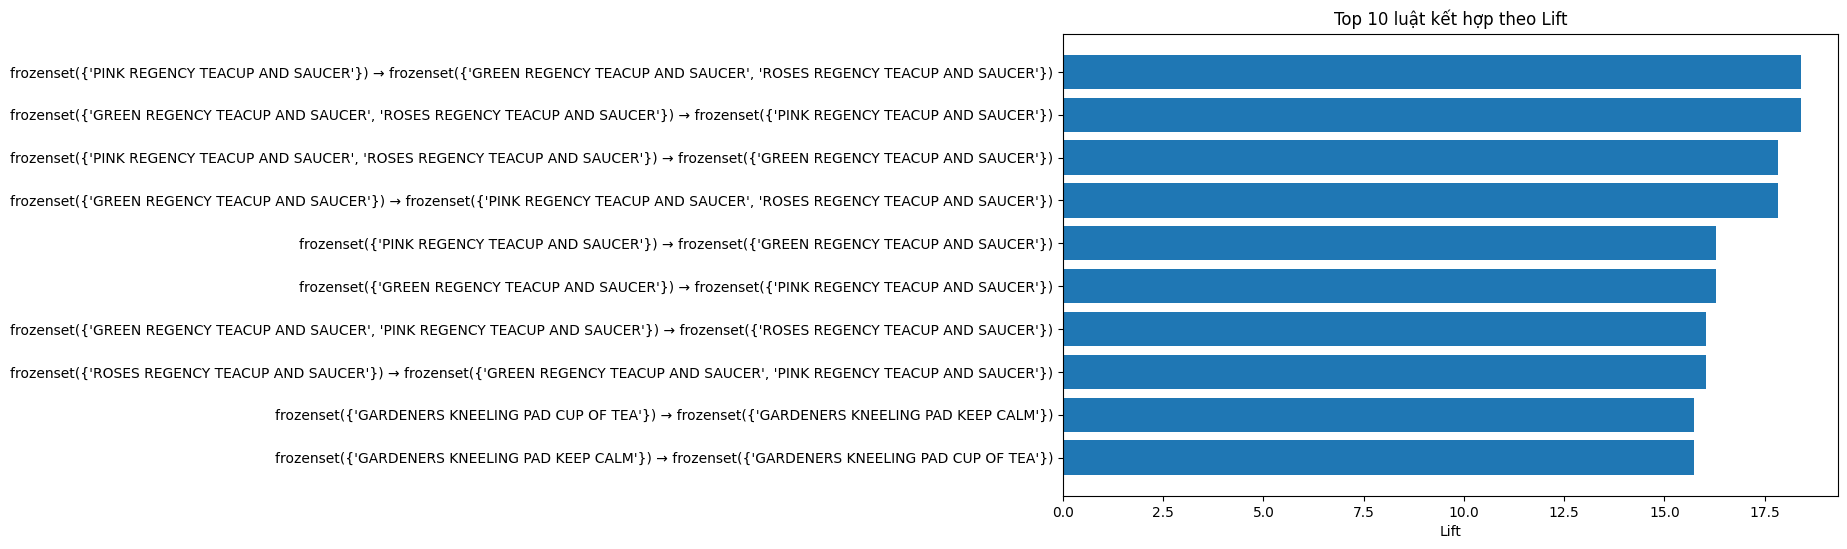

In [ ]:
# Lấy top 10 luật theo lift
top_rules = rules.nlargest(10, 'lift')

plt.figure(figsize=(10,6))
plt.barh(top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str),
         top_rules['lift'])
plt.xlabel("Lift")
plt.title("Top 10 luật kết hợp theo Lift")
plt.gca().invert_yaxis()  # để luật lift cao nhất ở trên cùng
plt.show()



Network Graph biểu diễn luật kết hợp

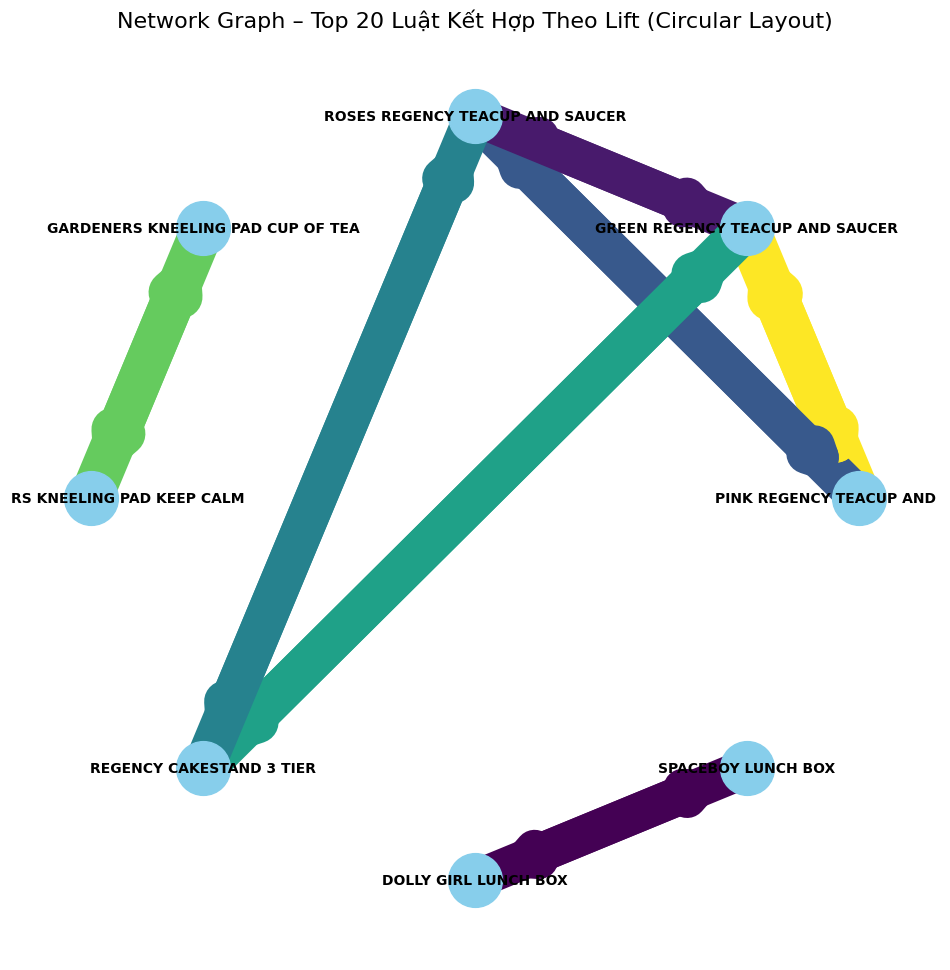

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Chỉ lấy top 20 luật theo lift
top_rules = rules.nlargest(20, 'lift')

# Tạo directed graph
G = nx.DiGraph()

# Thêm các cạnh từ luật
for i, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

# Circular layout: các node xếp vòng tròn
pos = nx.circular_layout(G)

plt.figure(figsize=(12,12))

# Vẽ nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='skyblue')

# Vẽ edges: độ dày & màu theo lift
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=20,
    width=[d['weight']*2 for (u,v,d) in edges],
    edge_color=[d['weight'] for (u,v,d) in edges],
    edge_cmap=plt.cm.viridis
)

# Vẽ labels riêng, font vừa phải
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Network Graph – Top 20 Luật Kết Hợp Theo Lift (Circular Layout)", fontsize=16)
plt.axis('off')
plt.show()




B11. Trực quan hóa luật

Heatmap co-occurrence (top 20 sản phẩm) để xem sản phẩm nào thường được mua cùng nhau

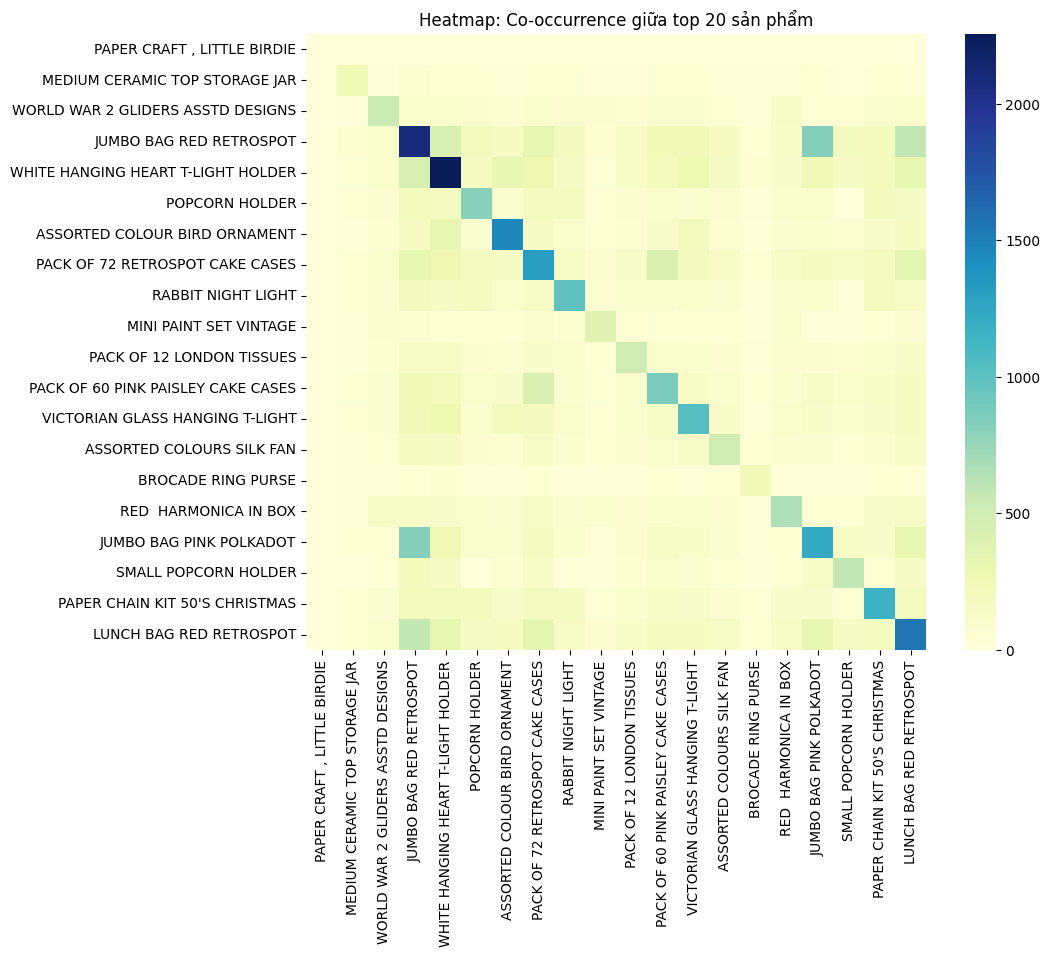

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 sản phẩm bán chạy nhất
topN = list(df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20).index)

# Lọc sparse matrix cho topN
basket_topN = basket_sparse[topN].astype(int)  # convert từ sparse sang int
coocc = basket_topN.T.dot(basket_topN)  # ma trận đồng xuất hiện

plt.figure(figsize=(10,8))
sns.heatmap(coocc, annot=False, cmap='YlGnBu')
plt.title('Heatmap: Co-occurrence giữa top 20 sản phẩm')
plt.show()


Network graph (luật lift cao) để trực quan hóa mối quan hệ giữa các sản phẩm dựa trên luật kết hợp

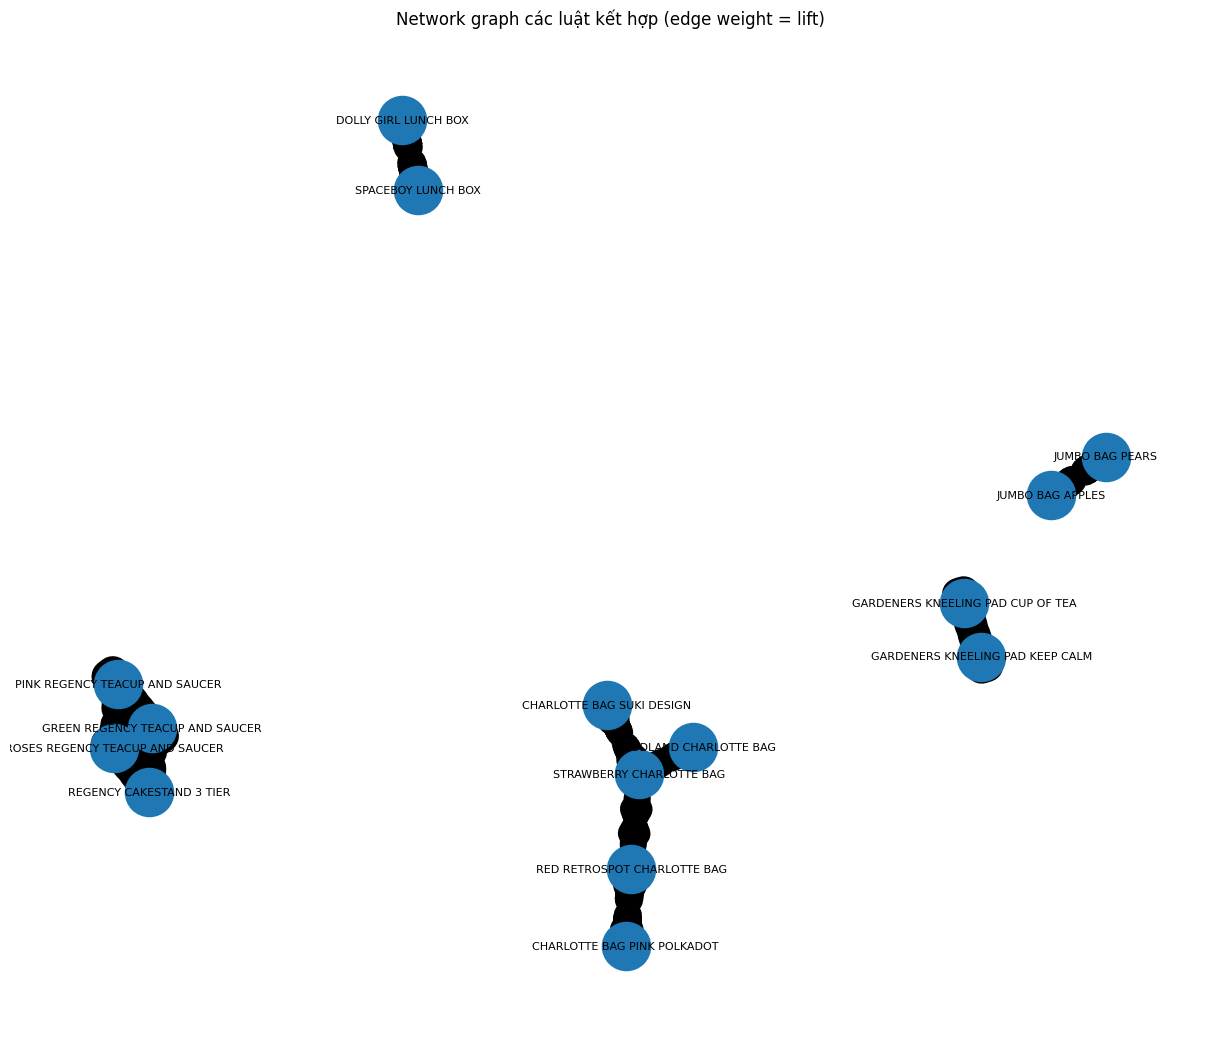

In [ ]:
import networkx as nx

# Chọn luật lift > 1.2 và support > 0.01
selected = rules[(rules['lift'] > 1.2) & (rules['support'] > 0.01)].head(30)

G = nx.DiGraph()
for _, row in selected.iterrows():
    for a in row['antecedents']:
        for b in row['consequents']:
            G.add_edge(a, b, weight=row['lift'])

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.5)
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=1200, font_size=8, width=[w*1.5 for w in weights])
plt.title('Network graph các luật kết hợp (edge weight = lift)')
plt.show()


In [2]:
# Import thư viện
import pandas as pd

# 1. Đọc file gốc
df = pd.read_csv("/content/drive/MyDrive/PTTQHDL/Online Retail.csv", encoding="ISO-8859-1")

# 2. Xem thông tin cơ bản
print("Thông tin dữ liệu gốc:")
print(df.info())
print(df.head())

# 3. Xử lý dữ liệu

# 3.1. Loại bỏ các hàng có missing CustomerID
df = df.dropna(subset=['CustomerID'])

# 3.2. Thay thế hoặc xử lý Description missing nếu cần
# Ví dụ: thay bằng giá trị phổ biến nhất
most_freq_desc = df['Description'].mode()[0]
df['Description'] = df['Description'].fillna(most_freq_desc)

# 3.3. Loại bỏ các giao dịch số lượng <= 0
df = df[df['Quantity'] > 0]

# 3.4. Loại bỏ các giao dịch giá <= 0
df = df[df['UnitPrice'] > 0]

# 3.5. Thêm cột TotalAmount = Quantity * UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# 4. Reset lại index
df = df.reset_index(drop=True)

# 5. Lưu file CSV sạch mới
df.to_csv("OnlineRetail_clean.csv", index=False, encoding="utf-8")

print("Hoàn tất! File OnlineRetail_clean.csv đã được tạo.")


Thông tin dữ liệu gốc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    5363

In [3]:
from google.colab import files

files.download("OnlineRetail_clean.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>